In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import time 
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import *
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical,image_dataset_from_directory

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix,roc_auc_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
training_path = r'C:\Users\Chaitanya\Documents\B.tech\4-1\CV_Lab_internal\Image\Training'
testing_path = r'C:\Users\Chaitanya\Documents\B.tech\4-1\CV_Lab_internal\Image\Testing'

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [5]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [4]:
training_data = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    subset='training',
    batch_size = 8,
    image_size=(256, 256),
    shuffle=True,
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [5]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    batch_size = 8,
    image_size=(256, 256),
    shuffle=True,
    subset='validation',
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [6]:
testing_data = tf.keras.utils.image_dataset_from_directory(
    testing_path,
    seed = 48,
    batch_size = 8,
    image_size = (256, 256),
    shuffle = True,
    label_mode = "categorical",
)

Found 1311 files belonging to 4 classes.


In [22]:
testing_data.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

### ResNet50

In [7]:
resnet_model = ResNet50(weights='imagenet', input_shape=(256,256,3), include_top=False)
model_res = Sequential()
model_res.add(Input(shape=(256,256,3)))
model_res.add(resnet_model)
model_res.add(Flatten())
model_res.add(Dropout(0.25))
model_res.add(Dense(128, activation='relu'))
model_res.add(Dropout(0.2))
model_res.add(Dense(4, activation='softmax')) # num labels = 4

model_res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout (Dropout)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 40,365,572
Trainable params: 40,312,452
No

In [8]:
model_res.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [10]:
history=model_res.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
572/572 [==============================] - 97s 150ms/step - loss: 0.4514 - accuracy: 0.8678 - precision: 0.8773 - recall: 0.8589 - val_loss: 0.4338 - val_accuracy: 0.9124 - val_precision: 0.9170 - val_recall: 0.8993
Epoch 2/15
572/572 [==============================] - 84s 147ms/step - loss: 0.1865 - accuracy: 0.9451 - precision: 0.9481 - recall: 0.9427 - val_loss: 0.1034 - val_accuracy: 0.9685 - val_precision: 0.9693 - val_recall: 0.9676
Epoch 3/15
572/572 [==============================] - 85s 148ms/step - loss: 0.0822 - accuracy: 0.9735 - precision: 0.9752 - recall: 0.9726 - val_loss: 0.2079 - val_accuracy: 0.9448 - val_precision: 0.9457 - val_recall: 0.9448
Epoch 4/15
572/572 [==============================] - 85s 149ms/step - loss: 0.1554 - accuracy: 0.9593 - precision: 0.9607 - recall: 0.9582 - val_loss: 0.1673 - val_accuracy: 0.9650 - val_precision: 0.9649 - val_recall: 0.9641
Epoch 5/15
572/572 [==============================] - 86s 151ms/step - loss: 0.0873 - accura

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 534797312, 'peak': 1742597376}

In [13]:
model_res.save('Resnet.h5')

In [14]:
model_res.evaluate(testing_data)

164/164 [==============================] - 8s 45ms/step - loss: 2.1028 - accuracy: 0.8696 - precision: 0.8723 - recall: 0.8650


[2.1028308868408203,
 0.8695651888847351,
 0.8723077178001404,
 0.8649885654449463]

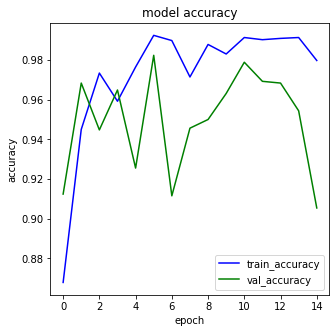

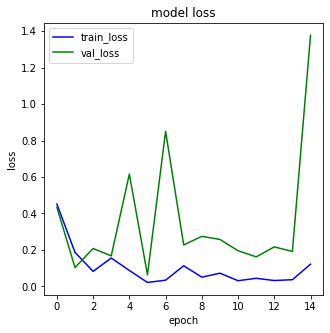

In [15]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist['loss'],color="b",label="train_loss")
plt.plot(hist['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

### CNN

In [17]:
filter_size=(5,5)
model_cnn=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,kernel_size=filter_size,activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.2),
    
    tf.keras.layers.Conv2D(64,kernel_size=filter_size,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.2),
    
    tf.keras.layers.Conv2D(128,kernel_size=filter_size,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Conv2D(128,kernel_size=filter_size,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(.2),
    
    tf.keras.layers.Dense(4,activation='softmax')
])  

In [18]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)    

In [19]:
model_cnn.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [20]:
history_cnn = model_cnn.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
572/572 [==============================] - 45s 74ms/step - loss: 0.8851 - accuracy: 0.7153 - precision_1: 0.7353 - recall_1: 0.6930 - val_loss: 0.5725 - val_accuracy: 0.7837 - val_precision_1: 0.7980 - val_recall_1: 0.7644
Epoch 2/15
572/572 [==============================] - 42s 73ms/step - loss: 0.5537 - accuracy: 0.8079 - precision_1: 0.8206 - recall_1: 0.7875 - val_loss: 0.4616 - val_accuracy: 0.8345 - val_precision_1: 0.8478 - val_recall_1: 0.8196
Epoch 3/15
572/572 [==============================] - 42s 73ms/step - loss: 0.4327 - accuracy: 0.8455 - precision_1: 0.8565 - recall_1: 0.8344 - val_loss: 0.3350 - val_accuracy: 0.8923 - val_precision_1: 0.9002 - val_recall_1: 0.8844
Epoch 4/15
572/572 [==============================] - 42s 74ms/step - loss: 0.3304 - accuracy: 0.8799 - precision_1: 0.8902 - recall_1: 0.8689 - val_loss: 0.3072 - val_accuracy: 0.9037 - val_precision_1: 0.9072 - val_recall_1: 0.8993
Epoch 5/15
572/572 [==============================] - 42s 74ms/s

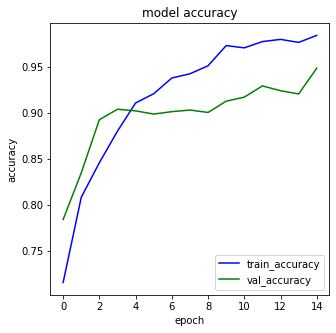

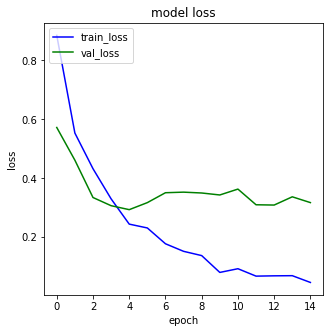

In [21]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist_cnn=history_cnn.history
plt.plot(hist_cnn["accuracy"],color="b",label="train_accuracy")
plt.plot(hist_cnn["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist_cnn['loss'],color="b",label="train_loss")
plt.plot(hist_cnn['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [22]:
model_cnn.save('cnn.h5')

In [23]:
model_cnn.evaluate(testing_data)

164/164 [==============================] - 4s 20ms/step - loss: 0.3214 - accuracy: 0.9420 - precision_1: 0.9427 - recall_1: 0.9420


[0.3213565945625305,
 0.9420289993286133,
 0.9427480697631836,
 0.9420289993286133]

In [24]:
model_cnn.metrics_names


['loss', 'accuracy', 'precision_1', 'recall_1']

In [25]:
model_cnn.predict(testing_data)

164/164 [==============================] - 3s 17ms/step


array([[4.8126015e-01, 5.1873964e-01, 3.3270386e-09, 2.7183077e-07],
       [9.9997997e-01, 1.4452297e-05, 4.9593623e-06, 6.5205842e-07],
       [1.1354782e-04, 9.9988341e-01, 1.3001386e-06, 1.6321595e-06],
       ...,
       [1.4068761e-06, 3.9672564e-06, 9.9998605e-01, 8.6101018e-06],
       [3.9953875e-06, 9.9999559e-01, 3.1161529e-09, 3.6623251e-07],
       [6.6825781e-11, 1.9440645e-09, 1.0000000e+00, 3.6479757e-11]],
      dtype=float32)

### Alexnet

In [26]:
model_alex = Sequential()
model_alex.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(256,256,3), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_alex.add(Conv2D(256,(5,5),padding='same',activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_alex.add(Conv2D(384,(3,3),padding='same',activation='relu'))
model_alex.add(Conv2D(384,(3,3),padding='same',activation='relu'))
model_alex.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model_alex.add(Flatten())
model_alex.add(Dense(4096, activation='relu'))
model_alex.add(Dropout(0.4))
model_alex.add(Dense(4096, activation='relu'))
model_alex.add(Dropout(0.4))
model_alex.add(Dense(4,activation='softmax'))

model_alex.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 96)        2688      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 384)       885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 384)      

In [27]:
model_alex.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [28]:
history_alex = model_cnn.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
572/572 [==============================] - 42s 73ms/step - loss: 0.0593 - accuracy: 0.9823 - precision_1: 0.9831 - recall_1: 0.9818 - val_loss: 0.3169 - val_accuracy: 0.9440 - val_precision_1: 0.9439 - val_recall_1: 0.9431
Epoch 2/15
572/572 [==============================] - 43s 74ms/step - loss: 0.0506 - accuracy: 0.9851 - precision_1: 0.9860 - recall_1: 0.9851 - val_loss: 0.3041 - val_accuracy: 0.9361 - val_precision_1: 0.9377 - val_recall_1: 0.9352
Epoch 3/15
572/572 [==============================] - 43s 75ms/step - loss: 0.0339 - accuracy: 0.9884 - precision_1: 0.9886 - recall_1: 0.9884 - val_loss: 0.2764 - val_accuracy: 0.9448 - val_precision_1: 0.9448 - val_recall_1: 0.9448
Epoch 4/15
572/572 [==============================] - 43s 75ms/step - loss: 0.0624 - accuracy: 0.9845 - precision_1: 0.9851 - recall_1: 0.9842 - val_loss: 0.2730 - val_accuracy: 0.9483 - val_precision_1: 0.9492 - val_recall_1: 0.9483
Epoch 5/15
572/572 [==============================] - 107s 187ms

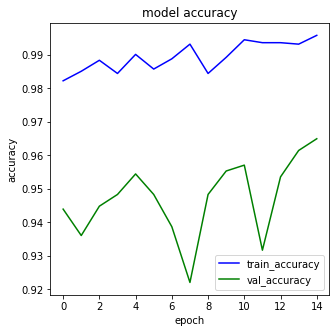

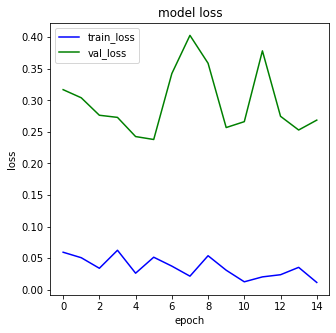

In [29]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist_cnn=history_alex.history
plt.plot(hist_cnn["accuracy"],color="b",label="train_accuracy")
plt.plot(hist_cnn["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist_cnn['loss'],color="b",label="train_loss")
plt.plot(hist_cnn['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [30]:
model_alex.save('alex.h5')

In [31]:
model_alex.evaluate(testing_data)

164/164 [==============================] - 11s 62ms/step - loss: 2.3274 - accuracy: 0.1922 - precision_2: 0.1821 - recall_2: 0.1396


[2.327359676361084,
 0.19221967458724976,
 0.18208955228328705,
 0.1395881026983261]

In [35]:
from tensorflow.keras.applications import MobileNet

mobile = MobileNet(weights = 'imagenet',input_shape=(256,256,3),include_top = False)
model_mobile = Sequential()
model_mobile.add(Input(shape=(256,256,3)))
model_mobile.add(resnet_model)
model_mobile.add(Flatten())
model_mobile.add(Dropout(0.25))
model_mobile.add(Dense(128, activation='relu'))
model_mobile.add(Dropout(0.2))
model_mobile.add(Dense(4, activation='softmax')) # num labels = 4

model_mobile.summary()

17225924/17225924 [==============================] - 39s 2us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_10 (Dropout)        (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 516       
                                                      

In [36]:
model_mobile.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [37]:
history_mobile = model_cnn.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
572/572 [==============================] - 179s 312ms/step - loss: 0.0262 - accuracy: 0.9939 - precision_1: 0.9939 - recall_1: 0.9939 - val_loss: 0.3582 - val_accuracy: 0.9527 - val_precision_1: 0.9535 - val_recall_1: 0.9527
Epoch 2/15
572/572 [==============================] - 179s 312ms/step - loss: 0.0294 - accuracy: 0.9926 - precision_1: 0.9926 - recall_1: 0.9926 - val_loss: 0.3481 - val_accuracy: 0.9553 - val_precision_1: 0.9553 - val_recall_1: 0.9545
Epoch 3/15
572/572 [==============================] - 179s 313ms/step - loss: 0.0199 - accuracy: 0.9943 - precision_1: 0.9943 - recall_1: 0.9941 - val_loss: 0.3219 - val_accuracy: 0.9518 - val_precision_1: 0.9518 - val_recall_1: 0.9518
Epoch 4/15
572/572 [==============================] - 179s 313ms/step - loss: 0.0034 - accuracy: 0.9987 - precision_1: 0.9989 - recall_1: 0.9987 - val_loss: 0.3827 - val_accuracy: 0.9553 - val_precision_1: 0.9553 - val_recall_1: 0.9553
Epoch 5/15
572/572 [==============================] - 17

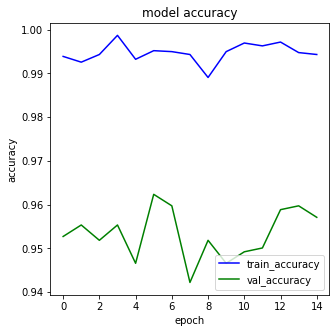

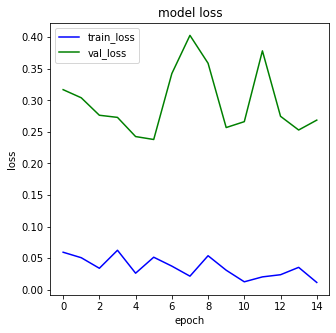

In [38]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist_mobile=history_mobile.history
plt.plot(hist_mobile["accuracy"],color="b",label="train_accuracy")
plt.plot(hist_mobile["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist_cnn['loss'],color="b",label="train_loss")
plt.plot(hist_cnn['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [49]:
model_mobile.save('mobilenet.h5')

In [40]:
model_mobile.evaluate(testing_data)

164/164 [==============================] - 10s 47ms/step - loss: 1.8841 - accuracy: 0.3524 - precision_3: 0.4115 - recall_3: 0.2624


[1.8840610980987549,
 0.3524027466773987,
 0.4114832580089569,
 0.26239511370658875]

In [41]:

vgg16 = tf.keras.applications.VGG16(weights = "imagenet",input_shape = (256,256,3),include_top = False)
for layer in vgg16.layers:
    layer.trainable = False

model_vgg16 = Sequential()
model_vgg16.add(Input(shape=(256,256,3)))
model_vgg16.add(vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dropout(0.25))
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.2))
model_vgg16.add(Dense(4, activation='softmax')) 

model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_12 (Dropout)        (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 18,909,636
Trainable params: 4,194,948
N

In [42]:
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [44]:
history_vgg16 = model_vgg16.fit(training_data, 
          epochs=15,
          validation_data=validation_data  
         )

Epoch 1/15
572/572 [==============================] - 62s 105ms/step - loss: 1.1831 - accuracy: 0.8042 - precision_4: 0.8094 - recall_4: 0.7982 - val_loss: 0.2580 - val_accuracy: 0.9159 - val_precision_4: 0.9218 - val_recall_4: 0.9089
Epoch 2/15
572/572 [==============================] - 58s 102ms/step - loss: 0.2763 - accuracy: 0.9077 - precision_4: 0.9141 - recall_4: 0.9037 - val_loss: 0.2538 - val_accuracy: 0.9247 - val_precision_4: 0.9271 - val_recall_4: 0.9238
Epoch 3/15
572/572 [==============================] - 59s 103ms/step - loss: 0.1928 - accuracy: 0.9368 - precision_4: 0.9418 - recall_4: 0.9341 - val_loss: 0.1848 - val_accuracy: 0.9405 - val_precision_4: 0.9444 - val_recall_4: 0.9378
Epoch 4/15
572/572 [==============================] - 59s 103ms/step - loss: 0.1243 - accuracy: 0.9565 - precision_4: 0.9570 - recall_4: 0.9551 - val_loss: 0.1596 - val_accuracy: 0.9588 - val_precision_4: 0.9605 - val_recall_4: 0.9588
Epoch 5/15
572/572 [==============================] - 59s 10

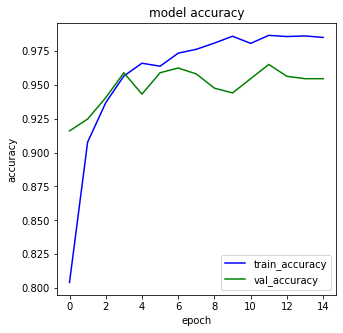

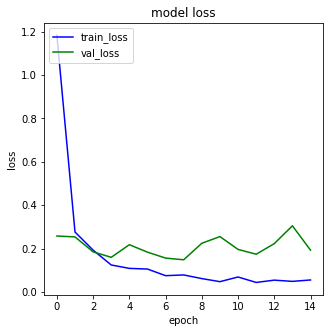

In [45]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist_vgg16=history_vgg16.history
plt.plot(hist_vgg16["accuracy"],color="b",label="train_accuracy")
plt.plot(hist_vgg16["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist_vgg16['loss'],color="b",label="train_loss")
plt.plot(hist_vgg16['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [48]:
model_vgg16.save('vgg_16.h5')

In [47]:
model_vgg16.evaluate(testing_data)

164/164 [==============================] - 14s 84ms/step - loss: 0.1534 - accuracy: 0.9649 - precision_4: 0.9649 - recall_4: 0.9649


[0.15339012444019318,
 0.9649122953414917,
 0.9649122953414917,
 0.9649122953414917]

### overall results on test data

In [57]:
overall_results = {"Accuracy":[0.942,0.192,0.352,0.869,0.964],
                    "Precision":[0.942,0.182,0.411,0.872,0.964],
                    "Recacll":[0.942,0.139,0.262,0.864,0.964]}
final_test_results = pd.DataFrame(overall_results,index= pd.Index(["CNN","Alexnet","mobilenet","ResNet","VGG16",]))

In [58]:
final_test_results

,Accuracy,Precision,Recacll
CNN,0.942,0.942,0.942
Alexnet,0.192,0.182,0.139
mobilenet,0.352,0.411,0.262
ResNet,0.869,0.872,0.864
VGG16,0.964,0.964,0.964
